### Loading the Data

In [1]:
import pandas as pd 

In [2]:
df = pd.read_pickle("./Data/news_Fake_Vectorized.pkl")
df.head(5)

,text,label,tokens,vector
0,No comment is expected from Barack Obama Membe...,1,"[comment, expect, Barack, Obama, Members, FYF9...","[0.02989684, 0.0266612, 0.018265275, 0.0700507..."
1,Did they post their votes for Hillary already?,1,"[post, vote, Hillary]","[0.045410156, -0.085250854, -0.049153645, -0.0..."
2,"Now, most of the demonstrators gathered last ...",1,"[ , demonstrator, gather, night, exercise, con...","[0.040579915, 0.06442566, 0.008007812, 0.10589..."
3,A dozen politically active pastors came here f...,0,"[dozen, politically, active, pastor, come, pri...","[0.07117676, 0.0048914626, -0.0015993273, 0.08..."
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,"[rs-28, Sarmat, missile, dub, Satan, 2, replac...","[-0.012512591, 0.05977534, 0.06800325, 0.07641..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72095 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    72095 non-null  object
 1   label   72095 non-null  int64 
 2   tokens  72095 non-null  object
 3   vector  72095 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


### Training and Testing Datasets

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test ,y_train, y_test = train_test_split(
    df.vector.values,
    df.label,
    test_size=0.2,
    random_state=2022,
    stratify=df.label
)

In [4]:
import numpy as np

print("Shape of X_train befpre reshaping", X_train.shape)
print("Shape of X_test befpre reshaping", X_test.shape)

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

print("Shape of X_train after reshaping", X_train_2d.shape)
print("Shape of X_test after reshaping", X_test_2d.shape)

Shape of X_train befpre reshaping (57676,)
Shape of X_test befpre reshaping (14419,)
Shape of X_train after reshaping (57676, 300)
Shape of X_test after reshaping (14419, 300)


## ML Models

In [5]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#### 1. Gradient Boosting Classifier

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf.fit(X_train_2d, y_train)
y_pred_log_reg = clf.predict(X_test_2d)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.8819613010610999
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      7006
           1       0.88      0.89      0.89      7413

    accuracy                           0.88     14419
   macro avg       0.88      0.88      0.88     14419
weighted avg       0.88      0.88      0.88     14419



#### 2. Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_2d, y_train)
y_pred_log_reg = log_reg.predict(X_test_2d)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.9013107705111312
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90      7006
           1       0.90      0.91      0.90      7413

    accuracy                           0.90     14419
   macro avg       0.90      0.90      0.90     14419
weighted avg       0.90      0.90      0.90     14419



#### 3. Support Vector Machines

In [6]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train_2d, y_train)
y_pred_svm = svm_clf.predict(X_test_2d)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9390387682918372
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      7006
           1       0.94      0.94      0.94      7413

    accuracy                           0.94     14419
   macro avg       0.94      0.94      0.94     14419
weighted avg       0.94      0.94      0.94     14419



In [7]:
# download Svm model
import pickle
pickle.dump(svm_clf, open('./Model/SVM_Model.pkl','wb'))

#### 4. Random Forest 

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train_2d, y_train)
y_pred_rf = rf_clf.predict(X_test_2d)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9118524169498579
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91      7006
           1       0.90      0.93      0.92      7413

    accuracy                           0.91     14419
   macro avg       0.91      0.91      0.91     14419
weighted avg       0.91      0.91      0.91     14419



## DL Models

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [21]:
num_classes = len(np.unique(y_train))
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

In [22]:
dnn_model = Sequential([
    Dense(128, input_dim=X_train_2d.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

C:\Users\hites\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
dnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
dnn_model.fit(X_train_2d, y_train_cat, epochs=100, batch_size=32, validation_data=(X_test_2d, y_test_cat))

Epoch 1/100
1803/1803 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9377 - loss: 0.1585 - val_accuracy: 0.9428 - val_loss: 0.1523
Epoch 2/100
1803/1803 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9386 - loss: 0.1555 - val_accuracy: 0.9438 - val_loss: 0.1516
Epoch 3/100
1803/1803 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9394 - loss: 0.1556 - val_accuracy: 0.9389 - val_loss: 0.1665
Epoch 4/100
1803/1803 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9404 - loss: 0.1512 - val_accuracy: 0.9463 - val_loss: 0.1501
Epoch 5/100
1803/1803 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9436 - loss: 0.1489 - val_accuracy: 0.9447 - val_loss: 0.1505
Epoch 6/100
1803/1803 ━━━━━━━━━━━━━━━━━━━━ 2s 994us/step - accuracy: 0.9440 - loss: 0.1446 - val_accuracy: 0.9471 - val_loss: 0.1438
Epoch 7/100
1803/1803 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9432 - loss: 0.1447 - val_accuracy: 0.9470 - val_loss: 0.1472
Epoch 8/100
1803/1803 ━━━━━━━━━━━━━━━━━━━━ 2s 981us/step - accuracy: 0.9440 - los

In [26]:
loss, accuracy = dnn_model.evaluate(X_test_2d, y_test_cat)
print("DNN Accuracy:", accuracy)

451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.9602 - loss: 0.1518
DNN Accuracy: 0.9574173092842102


### Confusion matrix for best model , DNN

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

In [28]:
y_pred_dnn = np.argmax(dnn_model.predict(X_test_2d), axis=1)

451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step


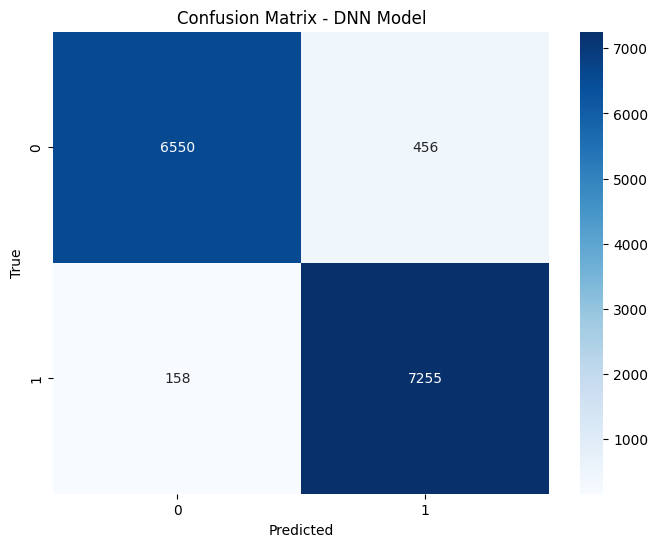

In [31]:
cm = confusion_matrix(y_test, y_pred_dnn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - DNN Model')
plt.show()

In [32]:
# download the dnn model
dnn_model.save("dnn_model.h5")